In [125]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as scipy
from sklearn.cluster import KMeans
import time
import matplotlib.gridspec as gridspec
from numpy import random
from IPython.display import display
import seaborn as sns
import sqlite3 as sq
import random
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import tree
from sklearn.svm import SVR
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn import model_selection
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline

from sklearn.ensemble import ExtraTreesClassifier

import warnings
from time import time
import datetime
warnings.simplefilter("ignore")
import math
import sys
import csv
import urllib
import collections


In [2]:
pat = r"C:\Users/Tony/Desktop/Big Data/05/04/"
database = pat + 'database.sqlite'
conn = sq.connect(database)
print("Connection Successful",conn)


Connection Successful <sqlite3.Connection object at 0x000001CBFDEA2C70>


In [5]:
df = pd.read_sql_query('SELECT * FROM Player_Attributes', conn)

In [5]:
team_att = pd.read_sql_query("SELECT * from Team_Attributes", conn)
team = pd.read_sql_query("SELECT * from Team", conn)
match = pd.read_sql_query("SELECT * from Match", conn)
match = match[['date', 'home_team_goal', 'away_team_goal', 'home_team_api_id', 'away_team_api_id', 
              'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession',
              'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD',
              'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD',
              'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']]

In [6]:

#shuffle match rows so split tables are randomized
match = match.reindex(np.random.permutation(match.index))

In [7]:
#split match data into training, validation, and test sets
m_train = match.iloc[:17861]
m_valid = match.iloc[17861:21108]
m_test = match.iloc[21108:]

In [10]:
match


,date,home_team_goal,away_team_goal,home_team_api_id,away_team_api_id,goal,shoton,shotoff,foulcommit,card,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
20298,2011-04-02 00:00:00,3,1,9800,8429,None,None,None,None,None,...,3.40,2.20,3.2,3.60,2.10,3.25,3.20,2.15,3.25,3.40
11451,2011-12-04 00:00:00,2,0,9885,9880,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,...,13.00,1.29,5.5,15.00,1.25,5.00,12.00,1.25,5.50,11.00
17648,2008-08-24 00:00:00,1,0,9809,10212,None,None,None,None,None,...,2.60,2.40,3.1,2.65,2.40,3.00,2.90,2.50,2.88,2.75
2610,2010-12-28 00:00:00,2,0,8586,10261,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,...,6.00,1.53,4.4,7.00,1.50,4.00,6.25,1.44,4.00,7.00
20661,2012-12-15 00:00:00,4,4,9938,8066,None,None,None,None,None,...,3.30,2.20,3.4,3.40,2.10,3.20,3.20,2.10,3.40,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,2012-10-07 00:00:00,2,2,8592,9847,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,...,2.38,3.12,3.2,2.50,3.20,3.30,2.35,3.00,3.20,2.38
2158,2009-11-28 00:00:00,1,4,8462,10260,<goal><value><comment>p</comment><stats><penal...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,...,1.33,8.00,4.5,1.36,8.00,4.50,1.37,8.50,4.33,1.40
428,2010-02-06 00:00:00,2,0,9984,9999,None,None,None,None,None,...,5.50,1.67,3.5,4.75,1.70,3.40,4.50,1.57,3.60,5.00
14830,2013-11-01 00:00:00,3,0,10219,9761,None,None,None,None,None,...,2.75,2.45,3.6,2.80,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#***********************************************************

df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [8]:
#is any row NULL ? 
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [9]:
#Now let’s try to find how many data points in each column are null.
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [10]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [11]:
# Fix it
# Take initial # of rows 
rows = df.shape[0]

# Drop the NULL rows 
df = df.dropna()

In [12]:
#Check if all NULLS are gone ?
print(rows)
df.isnull().any().any(), df.shape

183978


(False, (180354, 42))

In [13]:
#To find exactly how many lines we removed, we need to subtract
#the current number of rows in our data frame from the original number of rows.
#How many rows with NULL values?
rows - df.shape[0]

3624

In [14]:
# Mezcle las filas de df para obtener una muestra distribuida cuando visualicemos algunas filas superiores
df = df.reindex(np.random.permutation(df.index))

In [15]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
168422,168423,176009,40521,2013-09-20 00:00:00,68.0,72.0,right,medium,medium,63.0,...,69.0,67.0,57.0,60.0,60.0,9.0,13.0,14.0,13.0,6.0
34618,34619,110146,43282,2013-09-20 00:00:00,67.0,67.0,right,medium,medium,11.0,...,33.0,13.0,8.0,14.0,13.0,63.0,73.0,63.0,71.0,63.0
145608,145609,45574,30840,2014-01-31 00:00:00,83.0,83.0,left,medium,medium,81.0,...,86.0,78.0,28.0,36.0,25.0,11.0,11.0,5.0,15.0,13.0
57690,57691,199845,73024,2007-02-22 00:00:00,64.0,75.0,right,high,medium,35.0,...,47.0,41.0,62.0,65.0,60.0,11.0,9.0,9.0,13.0,11.0
95259,95260,192985,169200,2015-09-21 00:00:00,86.0,89.0,right,high,medium,90.0,...,88.0,77.0,30.0,39.0,40.0,15.0,13.0,5.0,10.0,13.0


In [16]:
df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
168422,67.0,68.0
34618,13.0,67.0
145608,78.0,83.0
57690,41.0,64.0
95259,77.0,86.0
133282,56.0,62.0
113176,31.0,65.0
118350,48.0,55.0
159900,50.0,75.0
58052,44.0,72.0


In [17]:
#Are these correlated (using Pearson’s correlation coefficient) ?

df['overall_rating'].corr(df['penalties'])


0.39271510791118897

In [18]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

In [20]:
 # verifique cómo se correlacionan las características con las calificaciones generales

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))


acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


In [21]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [22]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in cols 

correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]


len(cols), len(correlations)

(34, 34)

In [23]:
# create a function for plotting a dataframe with string columns and numeric values
def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df2.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df2.index)
    ax.set_xticklabels(df2.attributes, rotation=75); #Notice the ; (remove it and see what happens !)   
    plt.show()

In [24]:
# create a dataframe using cols and correlations
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

In [25]:
# create a dataframe using cols and correlations
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

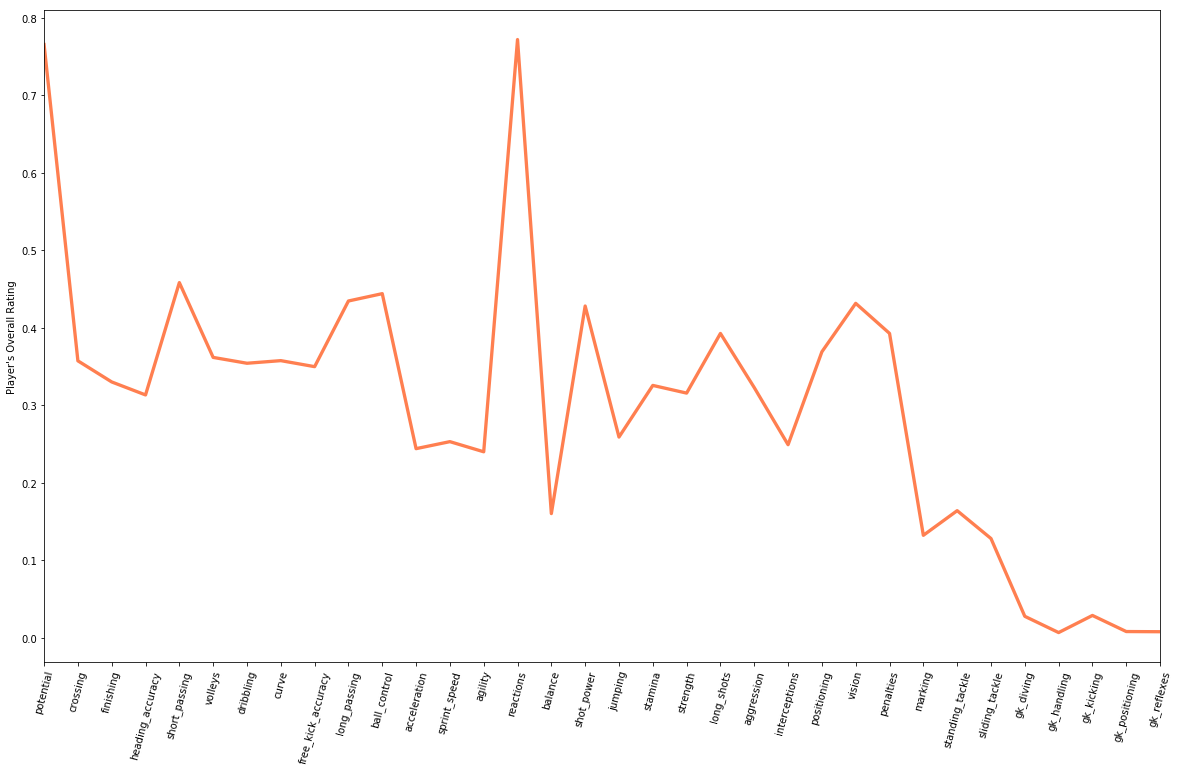

In [26]:
# let's plot above dataframe using the function we created     
plot_dataframe(df2, 'Player\'s Overall Rating')

In [27]:
# Define the features you want to use for grouping players
select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [28]:
# Generate a new dataframe by selecting the features you just defined
df_select = df[select5features].copy(deep=True)

In [29]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
168422,14.0,72.0,57.0,67.0,60.0
34618,63.0,67.0,8.0,23.0,14.0
145608,5.0,83.0,28.0,47.0,36.0
57690,9.0,75.0,62.0,61.0,65.0
95259,5.0,89.0,30.0,52.0,39.0


In [30]:
# Perform scaling on the dataframe containing the features
data = scale(df_select)

# Define number of clusters 
noOfClusters = 4

# Train a model 
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [31]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    50477
1    23774
2    50203
3    55900
dtype: int64

In [32]:
tables = pd.read_sql("SELECT * FROM sqlite_master where type='table'" ,conn)

tables.shape

(8, 5)

In [35]:
#Merging Database

raw_data = {
    'id': ['1', '2', '3', '4', '5'],
    'team_long_name': ['Austria', 'Belgium', 'Cyprus', 'Germany', 'Estonia'], 
  'team_short_name': ['AUT', 'BEL', 'CYP', 'GER', 'EST']}
df_a = pd.DataFrame(raw_data, columns = ['id', 'team_long_name', 'team_short_name'])
df_a

,id,team_long_name,team_short_name
0,1,Austria,AUT
1,2,Belgium,BEL
2,3,Cyprus,CYP
3,4,Germany,GER
4,5,Estonia,EST


In [36]:
raw_data = {
    'id': ['4', '5', '6', '7', '8'],
    'team_long_name': ['KSV Cercle Brugge', 'RSC Anderlecht', 'KAA Gent', 'RAEC Mons', 'FCV Dender EH'], 
    'team_short_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['id', 'team_long_name', 'team_short_name'])
df_b

,id,team_long_name,team_short_name
0,4,KSV Cercle Brugge,Bonder
1,5,RSC Anderlecht,Black
2,6,KAA Gent,Balwner
3,7,RAEC Mons,Brice
4,8,FCV Dender EH,Btisan


In [37]:
raw_data = {
    'id': ['1', '2', '3', '4', '5', '7', '8', '9',],
    'team_fifa_api_id': [673.0, 675.0, 15005.0, 2007.0, 1750.0, 229.0, 674.0, 1747.0]}
df_n = pd.DataFrame(raw_data, columns = ['id','team_fifa_api_id'])
df_n

,id,team_fifa_api_id
0,1,673.0
1,2,675.0
2,3,15005.0
3,4,2007.0
4,5,1750.0
5,7,229.0
6,8,674.0
7,9,1747.0


In [38]:
df_new = pd.concat([df_a, df_b])
df_new

,id,team_long_name,team_short_name
0,1,Austria,AUT
1,2,Belgium,BEL
2,3,Cyprus,CYP
3,4,Germany,GER
4,5,Estonia,EST
0,4,KSV Cercle Brugge,Bonder
1,5,RSC Anderlecht,Black
2,6,KAA Gent,Balwner
3,7,RAEC Mons,Brice
4,8,FCV Dender EH,Btisan


In [39]:
pd.merge(df_new, df_n, on='id')

,id,team_long_name,team_short_name,team_fifa_api_id
0,1,Austria,AUT,673.0
1,2,Belgium,BEL,675.0
2,3,Cyprus,CYP,15005.0
3,4,Germany,GER,2007.0
4,4,KSV Cercle Brugge,Bonder,2007.0
5,5,Estonia,EST,1750.0
6,5,RSC Anderlecht,Black,1750.0
7,7,RAEC Mons,Brice,229.0
8,8,FCV Dender EH,Btisan,674.0


In [34]:


countries = pd.read_sql_query('SELECT * FROM Country', conn)
matches = pd.read_sql_query('SELECT * FROM Match', conn)
leagues = pd.read_sql_query('SELECT * FROM League', conn)
teams = pd.read_sql_query('SELECT * FROM Team', conn)
tempmatch = pd.read_sql_query('SELECT * FROM Match', conn)
matches3 = matches2 = matches

In [60]:


matches.tail()
#matches.describe()



,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [62]:
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [63]:
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [64]:
#Seleccionando los países de interés

#Primero, seleccionaremos los países de interés para nuestro análisis. 
#Estoy seleccionando Inglaterra, Alemania y España, ya que estas son las ligas más populares y más vistas en el fútbol. Estas ligas son la liga más competitiva y darían una mejor comprensión del juego.

main_countries = ['England','Germany','Spain']
countries = countries[countries.name.isin(main_countries)]
leagues = countries.merge(leagues,on='id',suffixes=('', '_y'))
seasons = matches.season.unique()
leagues

,id,name,country_id,name_y
0,1729,England,1729,England Premier League
1,7809,Germany,7809,Germany 1. Bundesliga
2,21518,Spain,21518,Spain LIGA BBVA


In [65]:

#Merge the leagues with corresponding matches
req_matches = matches[matches.league_id.isin(leagues['id'])]
req_matches = req_matches[['id','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','season']]
req_matches["total_goals"] = req_matches['home_team_goal'] + req_matches['away_team_goal']
req_matches.dropna(inplace=True)
req_matches.head()



,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals
1728,1729,1729,10260,10261,1,1,2008/2009,2
1729,1730,1729,9825,8659,1,0,2008/2009,1
1730,1731,1729,8472,8650,0,1,2008/2009,1
1731,1732,1729,8654,8528,2,1,2008/2009,3
1732,1733,1729,10252,8456,4,2,2008/2009,6


In [66]:
#Adding results of the match

#Como este conjunto de datos no contenía el resultado del partido, agregaríamos los resultados comparando el objetivo del equipo local y el objetivo del equipo visitante para ese partido. Si el equipo local tiene más goles que el equipo visitante, entonces el equipo local ganó el partido y, de lo contrario, el equipo visitante ganó el partido. Si ambos goles son iguales, el partido terminó en empate. Estoy dando victoria como 1, empate como 0 y pérdida como -1 y luego lo agregué a la mesa.

def res(row):
    if row['home_team_goal'] == row['away_team_goal']:
        val = 0
    elif row['home_team_goal'] > row['away_team_goal']:
        val = 1
    else:
        val = -1
    return val

req_matches["result"] = req_matches.apply(res,axis = 1)
req_matches.head()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result
1728,1729,1729,10260,10261,1,1,2008/2009,2,0
1729,1730,1729,9825,8659,1,0,2008/2009,1,1
1730,1731,1729,8472,8650,0,1,2008/2009,1,-1
1731,1732,1729,8654,8528,2,1,2008/2009,3,1
1732,1733,1729,10252,8456,4,2,2008/2009,6,1


In [67]:
#Separando las ligas

#Los partidos deben estar separados y agrupados por sus ligas. Se crea un nuevo marco de datos para almacenar las ligas separadas.


new_matches = pd.merge(req_matches,leagues,left_on='league_id', right_on='id')
new_matches = new_matches.drop(['id_x','id_y','country_id'],axis = 1)
english = new_matches[new_matches.name == "England"]
spanish = new_matches[new_matches.name == "Spain"]
german = new_matches[new_matches.name == "Germany"]

display(english.head())
display(german.head())
display(spanish.tail())

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League
1,1729,9825,8659,1,0,2008/2009,1,1,England,England Premier League
2,1729,8472,8650,0,1,2008/2009,1,-1,England,England Premier League
3,1729,8654,8528,2,1,2008/2009,3,1,England,England Premier League
4,1729,10252,8456,4,2,2008/2009,6,1,England,England Premier League


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
3040,7809,9823,9790,2,2,2008/2009,4,0,Germany,Germany 1. Bundesliga
3041,7809,8178,9789,2,3,2008/2009,5,-1,Germany,Germany 1. Bundesliga
3042,7809,10189,9904,3,0,2008/2009,3,1,Germany,Germany 1. Bundesliga
3043,7809,8721,8722,2,1,2008/2009,3,1,Germany,Germany 1. Bundesliga
3044,7809,9810,8177,0,2,2008/2009,2,-1,Germany,Germany 1. Bundesliga


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
8523,21518,9906,10267,2,1,2015/2016,3,1,Spain,Spain LIGA BBVA
8524,21518,9864,9783,2,0,2015/2016,2,1,Spain,Spain LIGA BBVA
8525,21518,8315,9869,3,0,2015/2016,3,1,Spain,Spain LIGA BBVA
8526,21518,7878,8603,1,1,2015/2016,2,0,Spain,Spain LIGA BBVA
8527,21518,8370,8558,3,0,2015/2016,3,1,Spain,Spain LIGA BBVA


In [68]:
e = english.groupby('season')
s = spanish.groupby('season')
g = german.groupby('season')
seasons
display(e.head(2))
display(s.tail(2))
display(g.tail(2))

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League
1,1729,9825,8659,1,0,2008/2009,1,1,England,England Premier League
380,1729,10260,8658,1,0,2009/2010,1,1,England,England Premier League
381,1729,8586,8650,2,1,2009/2010,3,1,England,England Premier League
760,1729,10252,8654,3,0,2010/2011,3,1,England,England Premier League
761,1729,8655,8668,1,0,2010/2011,1,1,England,England Premier League
1140,1729,8655,8602,1,2,2011/2012,3,-1,England,England Premier League
1141,1729,9879,10252,0,0,2011/2012,0,0,England,England Premier League
1520,1729,9825,8472,0,0,2012/2013,0,0,England,England Premier League
1521,1729,8668,10260,1,0,2012/2013,1,1,England,England Premier League


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
5866,21518,9906,8661,2,0,2008/2009,2,1,Spain,Spain LIGA BBVA
5867,21518,10267,8696,2,4,2008/2009,6,-1,Spain,Spain LIGA BBVA
6246,21518,8394,9865,2,1,2009/2010,3,1,Spain,Spain LIGA BBVA
6247,21518,9864,10267,0,1,2009/2010,1,-1,Spain,Spain LIGA BBVA
6626,21518,9783,8558,3,0,2010/2011,3,1,Spain,Spain LIGA BBVA
6627,21518,8661,8581,2,1,2010/2011,3,1,Spain,Spain LIGA BBVA
7006,21518,8603,8370,0,2,2011/2012,2,-1,Spain,Spain LIGA BBVA
7007,21518,9869,7878,2,0,2011/2012,2,1,Spain,Spain LIGA BBVA
7386,21518,9910,9783,1,1,2012/2013,2,0,Spain,Spain LIGA BBVA
7387,21518,8370,8634,0,5,2012/2013,5,-1,Spain,Spain LIGA BBVA


,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,name,name_y
3344,7809,9788,8295,1,0,2008/2009,1,1,Germany,Germany 1. Bundesliga
3345,7809,8226,9790,3,0,2008/2009,3,1,Germany,Germany 1. Bundesliga
3650,7809,8722,9905,1,0,2009/2010,1,1,Germany,Germany 1. Bundesliga
3651,7809,8165,8177,3,0,2009/2010,3,1,Germany,Germany 1. Bundesliga
3956,7809,9904,8722,2,1,2010/2011,3,1,Germany,Germany 1. Bundesliga
3957,7809,8165,8721,2,1,2010/2011,3,1,Germany,Germany 1. Bundesliga
4262,7809,8721,8165,2,1,2011/2012,3,1,Germany,Germany 1. Bundesliga
4263,7809,9788,8178,2,2,2011/2012,4,0,Germany,Germany 1. Bundesliga
4568,7809,8357,8697,1,1,2012/2013,2,0,Germany,Germany 1. Bundesliga
4569,7809,8194,8721,1,4,2012/2013,5,-1,Germany,Germany 1. Bundesliga


array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

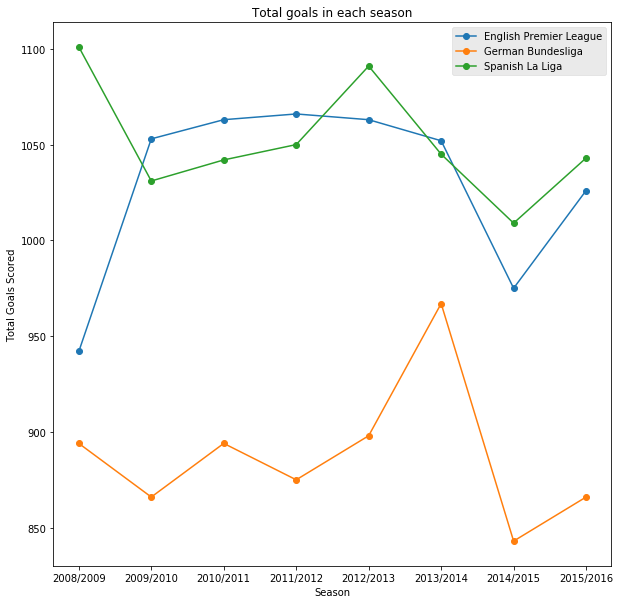

In [69]:
#Trazar el total de goles marcados cada temporada

#Trazamos el número total de goles marcados por todos los equipos en cada temporada

fig = plt.figure(figsize=(10, 10))
plt.title("Total goals in each season")
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.ylabel("Total Goals Scored")
num_seasons = range(len(seasons))

plt.plot(num_seasons,e.total_goals.sum().values,label = "English Premier League", marker = 'o')
plt.plot(num_seasons,g.total_goals.sum().values,label = "German Bundesliga", marker = 'o')
plt.plot(num_seasons,s.total_goals.sum().values,label = "Spanish La Liga", marker = 'o')
plt.legend()
seasons


#Podemos ver que los equipos españoles en general anotan más que los equipos en la Premier League y en la Bundesliga. Pero el total de goles en la Bundesliga es bajo debido al hecho de que solo 18 equipos compiten en la liga. Por lo tanto, cada equipo en la Bundesliga juega solo 34 partidos en una temporada, mientras que cada equipo en la liga premier juega 38 partidos. Entonces, el total de juegos jugados en la Premier League y La Liga es 380, mientras que el total de juegos jugados en la Bundesliga es 306.

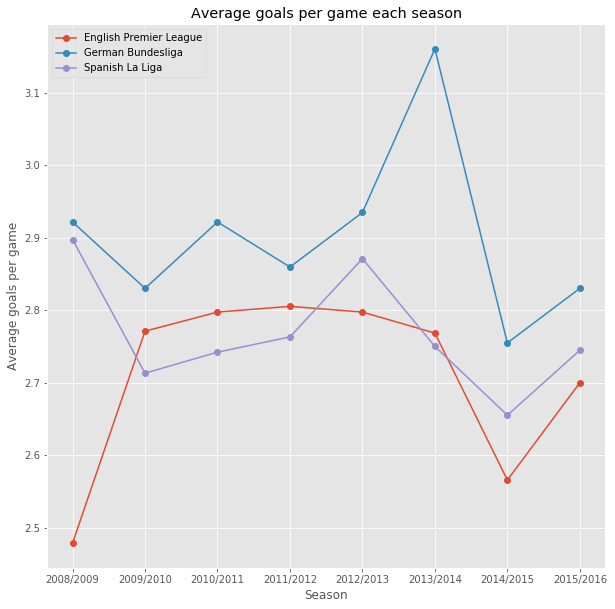

In [70]:
#We calculate average goals scored in each game
#Plotting average goals scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlabel("Season")
plt.title("Average goals per game each season")
plt.ylabel("Average goals per game")

plt.plot(num_seasons,e.total_goals.mean().values,label = "English Premier League", marker = 'o')
plt.plot(num_seasons,g.total_goals.mean().values,label = "German Bundesliga", marker = 'o')
plt.plot(num_seasons,s.total_goals.mean().values,label = "Spanish La Liga", marker = 'o')
plt.legend(loc = 2)

#Los equipos de la Bundesliga puntúan mucho más en promedio en cada juego que los equipos de otras ligas. En la temporada 2013/2014, los equipos de la Bundesliga anotaron más de 3 goles cada juego en promedio (967 goles en 306 partidos - 3.16 por partido).

In [73]:
average_goals_english = english.total_goals.mean()
average_goals_spanish = spanish.total_goals.mean()
average_goals_german = german.total_goals.mean()
print("{:.2}".format(average_goals_english))
print("{:.2}".format(average_goals_spanish))
print("{:.2}".format(average_goals_german))

2.7
2.8
2.9


In [74]:
#Top Goal Scoring Team at Home
#Merging Home team and matches

matches_h_teams = pd.merge(new_matches,teams,left_on='home_team_api_id', right_on='team_api_id')
matches_h_teams = matches_h_teams.drop(['id','team_api_id','team_fifa_api_id'],axis = 1)
matches_h_teams = matches_h_teams.rename(columns={'team_long_name':'home_team_long_name','name_y':'league_name','name':'country_name'})
matches_h_teams.head()

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,country_name,league_name,home_team_long_name,team_short_name
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League,Manchester United,MUN
1,1729,10260,8654,2,0,2008/2009,2,1,England,England Premier League,Manchester United,MUN
2,1729,10260,8667,4,3,2008/2009,7,1,England,England Premier League,Manchester United,MUN
3,1729,10260,10194,5,0,2008/2009,5,1,England,England Premier League,Manchester United,MUN
4,1729,10260,8472,1,0,2008/2009,1,1,England,England Premier League,Manchester United,MUN


Text(0.5, 0, 'Team name')

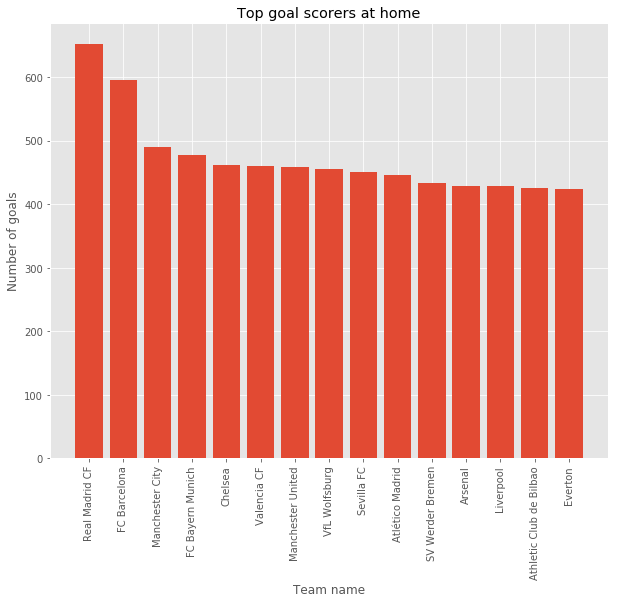

In [75]:
top_goal_scorers_home = matches_h_teams.groupby('home_team_long_name').total_goals.sum().sort_values(ascending = False)
top_goal_scorers_home.head(15)
%matplotlib inline 
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(15), top_goal_scorers_home.head(15).values,align = "center")
ax.set_xticks(range(15))
ax.set_xticklabels(top_goal_scorers_home.head(15).index,rotation = "vertical")
ax.set_title("Top goal scorers at home")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

In [76]:
#Top Goal Scoring Team at away
#Merging Away team and matches

matches_a_teams = pd.merge(new_matches,teams,left_on='away_team_api_id', right_on='team_api_id')
matches_a_teams = matches_a_teams.drop(['id','team_api_id','team_fifa_api_id'],axis = 1)
matches_a_teams = matches_a_teams.rename(columns={'team_long_name':'away_team_long_name','name_y':'league_name','name':'country_name'})
matches_a_teams.head()

,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result,country_name,league_name,away_team_long_name,team_short_name
0,1729,10260,10261,1,1,2008/2009,2,0,England,England Premier League,Newcastle United,NEW
1,1729,9879,10261,2,1,2008/2009,3,1,England,England Premier League,Newcastle United,NEW
2,1729,8455,10261,0,0,2008/2009,0,0,England,England Premier League,Newcastle United,NEW
3,1729,8549,10261,0,0,2008/2009,0,0,England,England Premier League,Newcastle United,NEW
4,1729,8462,10261,0,3,2008/2009,3,-1,England,England Premier League,Newcastle United,NEW


Text(0.5, 0, 'Team name')

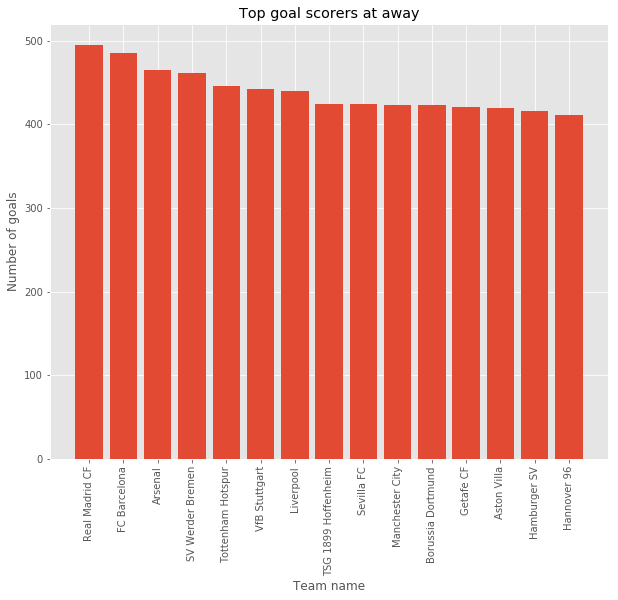

In [77]:
top_goal_scorers_away = matches_a_teams.groupby('away_team_long_name').total_goals.sum().sort_values(ascending = False)
top_goal_scorers_away.head(15)
%matplotlib inline 
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(range(15), top_goal_scorers_away.head(15).values,align = "center")
ax.set_xticks(range(15))
ax.set_xticklabels(top_goal_scorers_away.head(15).index,rotation = "vertical")
ax.set_title("Top goal scorers at away")
ax.set_ylabel("Number of goals")
ax.set_xlabel("Team name")

In [149]:
#select fields
matches = matches3[matches3.league_id.isin(leagues.id)]
matches = matches[['id', 'country_id' ,'league_id', 'season', 'stage', 'date','match_api_id', 'home_team_api_id', 'away_team_api_id','B365H', 'B365D' ,'B365A']]
matches.dropna(inplace=True)
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,B365A
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1.29,5.5,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1.20,6.5,15.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,5.50,3.6,1.67
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,1.91,3.4,4.20
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,1.91,3.4,4.33


In [79]:
#Probabilidad de ganar en cuotas de apuestas

#"Cuotas de apuestas"
#Cálculo de entropía para determinar la previsibilidad

#La entropía se calcula para medir el trastorno usando las probabilidades de bet365. Cuanto mayor es el valor de entropía, más impredecibles son los resultados de las coincidencias.

from scipy.stats import entropy

def match_entropy(row):
    odds = [row['B365H'],row['B365D'],row['B365A']]
    #change odds to probability
    probs = [1/o for o in odds]
    #normalize to sum to 1
    norm = sum(probs)
    probs = [p/norm for p in probs]
    return entropy(probs)

#compute match entropy
matches['entropy'] = matches.apply(match_entropy,axis=1)

In [80]:
#compute mean entropy for every league in every season
entropy_means = matches.groupby(('season','league_id')).entropy.mean()
entropy_means = entropy_means.reset_index().pivot(index='season', columns='league_id', values='entropy')
entropy_means.columns = [leagues[leagues.id==x].name.values[0] for x in entropy_means.columns]
entropy_means.head(10)

,England,Germany,Spain
season,,,
2008/2009,0.984556,1.004276,1.010859
2009/2010,0.956496,0.997925,0.977810
2010/2011,0.983258,1.016264,0.975032
2011/2012,0.969593,1.001298,0.955339
2012/2013,0.981472,0.993993,0.970580
2013/2014,0.960473,0.977500,0.944218
2014/2015,0.980301,0.985835,0.933637
2015/2016,0.997819,0.974657,0.946813


Text(7.3, 0.952, 'more predictable')

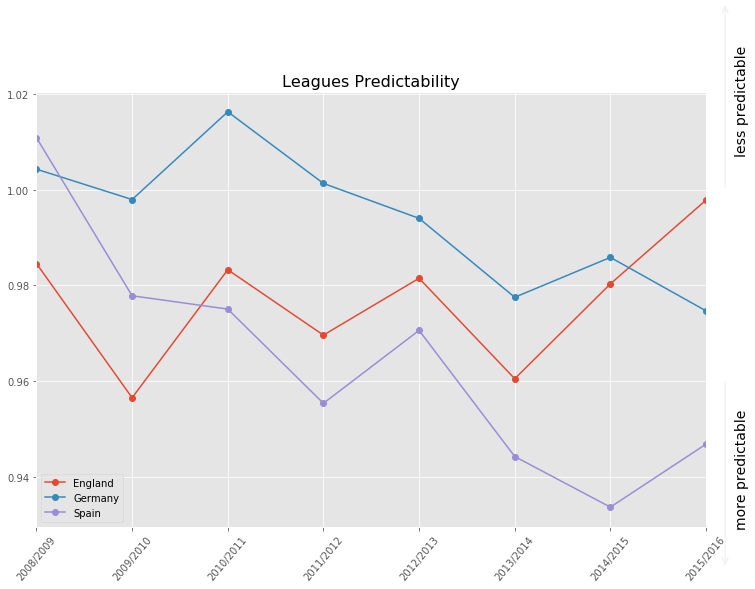

In [81]:
#plot graph
ax = entropy_means.plot(figsize=(12,8),marker='o')

#set title
plt.title('Leagues Predictability', fontsize=16)

#set ticks roatation
plt.xticks(rotation=50)

#keep colors for next graph
colors = [x.get_color() for x in ax.get_lines()]
colors_mapping = dict(zip(leagues.id,colors))

#remove x label
ax.set_xlabel('')

#locate legend 
plt.legend(loc='lower left')

#add arrows
ax.annotate('', xytext=(7.2, 1),xy=(7.2, 1.039),
            arrowprops=dict(facecolor='black',arrowstyle="->, head_length=.7, head_width=.3",linewidth=1), annotation_clip=False)

ax.annotate('', xytext=(7.2, 0.96),xy=(7.2, 0.921),
            arrowprops=dict(facecolor='black',arrowstyle="->, head_length=.7, head_width=.3",linewidth=1), annotation_clip=False)

ax.annotate('less predictable', xy=(7.3, 1.028), annotation_clip=False,fontsize=14,rotation='vertical')
ax.annotate('more predictable', xy=(7.3, 0.952), annotation_clip=False,fontsize=14,rotation='vertical')


In [82]:
# Considering English Premier League

main_countries = ['England']
countries = countries[countries.name.isin(main_countries)]
leagues = countries.merge(leagues,on='id',suffixes=('', '_y'))
seasons = matches.season.unique()
leagues

,id,name,name_y,country_id,name_y
0,1729,England,England,1729,England Premier League


In [83]:
#Merge the leagues with corresponding matches

req_matches = matches2[matches2.league_id.isin(leagues['id'])]
req_matches = req_matches[['id','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal','season']]
req_matches["total_goals"] = req_matches['home_team_goal'] + req_matches['away_team_goal']
req_matches["result"] = req_matches.apply(res,axis = 1)
req_matches.dropna(inplace=True)
req_matches.tail()

,id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season,total_goals,result
4763,4764,1729,8466,8197,2,2,2015/2016,4,0
4764,4765,1729,10003,10194,0,1,2015/2016,1,-1
4765,4766,1729,8586,8650,0,0,2015/2016,0,0
4766,4767,1729,9817,9825,0,3,2015/2016,3,-1
4767,4768,1729,8659,8472,1,0,2015/2016,1,1


In [84]:
new_matches = pd.merge(req_matches,leagues,left_on='league_id', right_on='id')
new_matches = new_matches.drop(['id_x','id_y','country_id'],axis = 1)
english = new_matches[new_matches.name == "England"]

# sum_goals = new_group_matches.home_team_goal.sum()
e = english.groupby('season')
seasons
%matplotlib inline

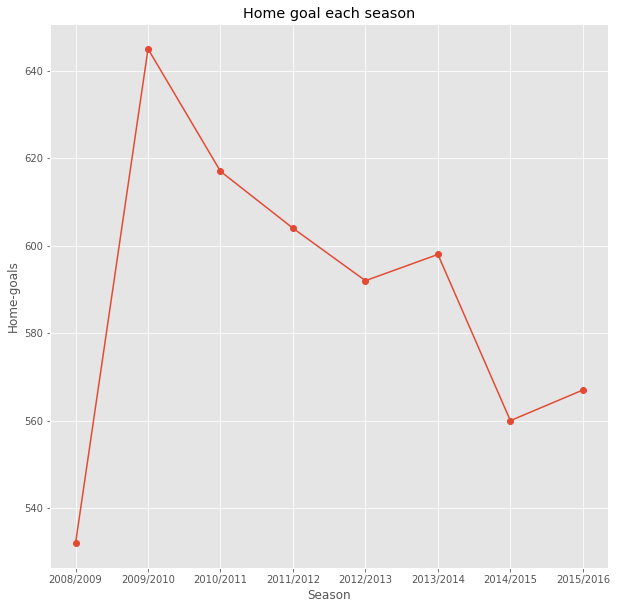

In [85]:
#Plotting home scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Home goal each season')
plt.xlabel('Season')
plt.ylabel('Home-goals')
plt.plot(num_seasons,e.home_team_goal.sum().values,label = "English Premier League", marker = 'o')

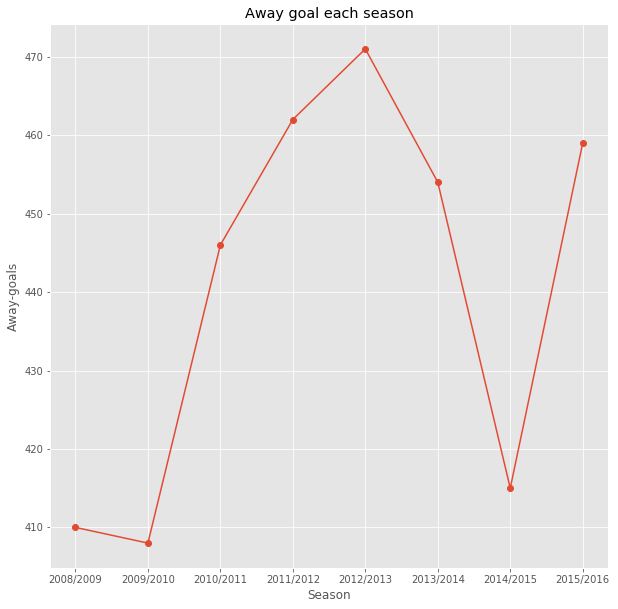

In [86]:
#Total number of goals scored in Away matches
#Plotting away scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Away goal each season')
plt.xlabel('Season')
plt.ylabel('Away-goals')
plt.plot(num_seasons,e.away_team_goal.sum().values,label = "English Premier League", marker = 'o')

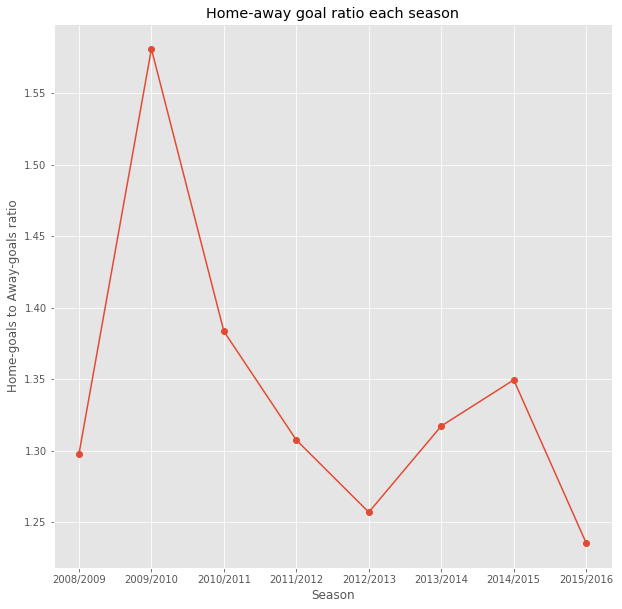

In [87]:
#Home goals to Away goals ratio
#Plotting home/away scored each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.title('Home-away goal ratio each season')
plt.xlabel('Season')
plt.ylabel('Home-goals to Away-goals ratio')
plt.plot(num_seasons,e.home_team_goal.sum().values / e.away_team_goal.sum().values,label = "English Premier League", marker = 'o')

array([1.57272727, 2.12087912, 1.98888889, 1.47413793, 1.56603774,
       1.45528455, 1.49565217, 1.35344828])

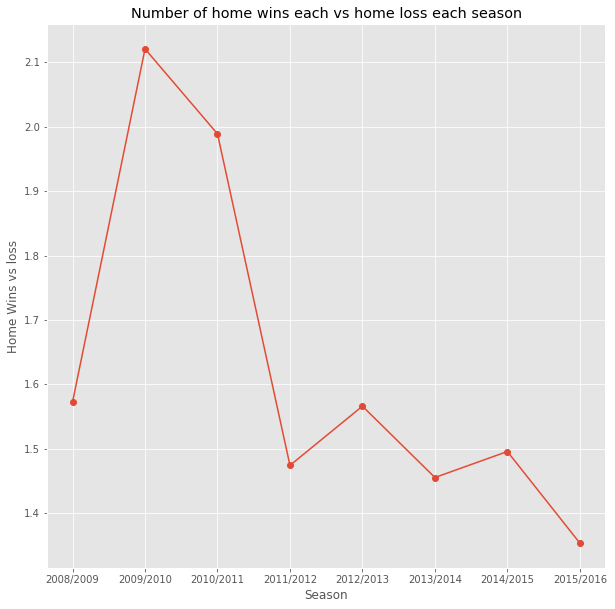

In [88]:
#Home wins vs Home Loss
#Subsetting homewins vs homeloss from each of the leagues - ignoring draws.
e_hw = np.true_divide(english[english.result == 1].groupby('season').result.sum().values,english[english.result == -1].groupby('season').result.sum().values * -1)


#Plotting number of home wins vs home losses each season
fig = plt.figure(figsize=(10, 10))
plt.xticks(range(len(seasons)),seasons)
plt.style.use('ggplot')
plt.xlim = (-20,20)
plt.ylim = (0,120)
plt.title("Number of home wins each vs home loss each season")
plt.xlabel("Season")
plt.ylabel("Home Wins vs loss")
plt.plot(num_seasons,e_hw,label = "English Premier League", marker = 'o')
display(e_hw)

In [54]:
# Team goal means

data['par1'] = data['FTHG'].groupby(data['HomeTeam']).transform('mean')
data['par2'] = data['FTHG'].groupby(data['AwayTeam']).transform('mean')
data['par3'] = data['FTAG'].groupby(data['HomeTeam']).transform('mean')
data['par4'] = data['FTAG'].groupby(data['AwayTeam']).transform('mean')

data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,par1,par2,par3,par4
0,AJ Auxerre2008/2009,FC Nantes2008/2009,2,1,0.947368,1.526316,0.631579,0.631579
1,Girondins de Bordeaux2008/2009,SM Caen2008/2009,2,1,1.894737,1.684211,0.631579,1.052632
2,Le Havre AC2008/2009,OGC Nice2008/2009,1,0,0.894737,1.157895,1.789474,0.947368
3,Le Mans FC2008/2009,FC Lorient2008/2009,0,1,0.947368,1.421053,1.105263,1.368421
4,AS Monaco2008/2009,Paris Saint-Germain2008/2009,1,0,1.368421,1.105263,1.210526,1.052632


In [3]:
%matplotlib inline

from numpy import random
from time import time

In [4]:
 Player_Attributes = pd.read_sql_query("SELECT * from Player_Attributes", conn)
Player_Attributes.shape

(183978, 42)

In [5]:
#select relevant fields
Player_Attributes.dropna(inplace=True)
Player_Attributes.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date'], axis = 1, inplace = True)
overall_rating = Player_Attributes['overall_rating']
features = Player_Attributes.drop('overall_rating', axis = 1)
features.head()

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [44]:

EPL_data =  pd.read_csv(r"C:\Users/Tony/Desktop/Big Data/05/04/Training_Data.csv")
 
EPL_data.head()

,ID,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HC,AC,HY,AY,HR,AR,Winner,Loser
0,1,13-Aug-05,Everton,Man United,0,2,A,0,1,A,...,15,14,8,6,3,1,0,0,Man United,Everton
1,2,13-Aug-05,Man City,West Brom,0,0,D,0,0,D,...,13,11,3,6,2,3,0,0,None,None
2,3,14-Aug-05,Arsenal,Newcastle,2,0,H,0,0,D,...,15,17,8,3,0,1,0,1,Arsenal,Newcastle
3,4,20-Aug-05,Newcastle,West Ham,0,0,D,0,0,D,...,9,11,10,2,1,1,0,1,None,None
4,5,21-Aug-05,Chelsea,Arsenal,1,0,H,0,0,D,...,17,21,3,7,2,3,0,0,Chelsea,Arsenal


In [52]:

team_names =  pd.read_csv(r"C:\Users/Tony/Desktop/Big Data/05/04/Team_Names.csv")

team_names.head()

,Team_Name
0,Arsenal
1,Burnley
2,Everton
3,Leicester
4,Man City


In [87]:
EPL_data ['year'] = pd.DatetimeIndex(EPL_data['Date']).year
EPL_data.head()

,ID,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,Winner,Loser,year
0,1,13-Aug-05,Everton,Man United,0,2,A,0,1,A,...,14,8,6,3,1,0,0,Man United,Everton,2005
1,2,13-Aug-05,Man City,West Brom,0,0,D,0,0,D,...,11,3,6,2,3,0,0,None,None,2005
2,3,14-Aug-05,Arsenal,Newcastle,2,0,H,0,0,D,...,17,8,3,0,1,0,1,Arsenal,Newcastle,2005
3,4,20-Aug-05,Newcastle,West Ham,0,0,D,0,0,D,...,11,10,2,1,1,0,1,None,None,2005
4,5,21-Aug-05,Chelsea,Arsenal,1,0,H,0,0,D,...,21,3,7,2,3,0,0,Chelsea,Arsenal,2005


In [93]:
teamList = team_names['Team_Name'].tolist()

In [94]:
#get annual vectors for each team
def getAnnualTeamData(teamName, year):
    
    annual_data = EPL_data[EPL_data['year'] == year]
    
    # num goals scored in wins and losses
    gamesHome = annual_data[annual_data['HomeTeam'] == teamName] 
    totalGoalsScored = gamesHome['FTHG'].sum()
    gamesAway = annual_data[annual_data['AwayTeam'] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    #total goals scored
    totalGoalsScored += gamesAway['FTAG'].sum()
    # total goals allowed
    totalGoalsAllowed = gamesHome['FTAG'].sum()
    totalGoalsAllowed += gamesAway['FTHG'].sum()
    
    #discipline: total red cards, total yellow cards
    totalYellowCards = gamesHome['HY'].sum()
    totalYellowCards += gamesAway['AY'].sum()
    totalRedCards = gamesHome['HR'].sum()
    totalRedCards += gamesAway['AR'].sum()
    
    #total fouls
    totalFouls = gamesHome['HF'].sum()
    totalFouls += gamesAway['AF'].sum()
    
    #total Corners
    totalCorners = gamesHome['HC'].sum()
    totalCorners += gamesAway['AC'].sum()

    #shots per game (spg) = total shots / total games 
    totalShots = gamesHome['HS'].sum()
    # avg shots per game
    totalShots += gamesAway['AS'].sum()
    if numGames != 0:
        spg = totalShots / numGames
    # avg shots allowed per game
    totalShotsAgainst = gamesHome['AS'].sum()
    totalShotsAgainst += gamesAway['HS'].sum()
    if numGames != 0:
        sag = totalShotsAgainst / numGames
    
    #Games Won Percentage = Games Won / (Games Won + Games Lost) 
    gamesWon = annual_data[annual_data['Winner'] == teamName] 
    gamesLost = annual_data[annual_data['Loser'] == teamName] 
    numGamesWon = len(gamesWon.index)
    numGamesLost = len(gamesLost.index)
    if numGames != 0:
        gamesWonPercentage = numGamesWon / numGames
    
    #Defense stats
        #Goalie Saves = Shots on Goal - Goal Scored
    totalShotsOnGoal = gamesHome['HST'].sum()
    totalShotsOnGoal += gamesAway['AST'].sum()
    goalieSaves = totalShotsOnGoal - totalGoalsAllowed
    
        #Saves Percentage = Goalie Saves / Shots on Goal   
    if totalShotsOnGoal != 0:
        savesPercentage = goalieSaves / totalShotsOnGoal
        
        #Saves Ratio = Shots On Goal / Goalie Saves    
    if goalieSaves != 0:
        savesRatio = totalShotsOnGoal / goalieSaves

    #Offense stats
        #Scoring Percentage = (Scoring Attempts - Goals Scored ) / Scoring Attempts
    if totalShots != 0:
        scoringPercentage = (totalShots - totalGoalsScored) / totalShots
        
        #Scoring Ratio = Shots On Goal / Goals Scored
    if totalGoalsScored != 0:
        scoringRatio = totalShotsOnGoal / totalGoalsScored       
        
            
    if numGames == 0: #if team not in dataset
        gamesWon = 0
        gamesLost = 0
        totalGoalsScored = 0
        totalGoalsAllowed = 0
        totalYellowCards = 0
        totalRedCards = 0
        totalFouls = 0
        totalCorners = 0
        spg = 0
        sag = 0
        gamesWonPercentage = 0
        goalieSaves = 0
        savesPercentage = 0
        savesRatio = 0
        scoringPercentage = 0
        scoringRatio = 0 
        
    return [totalGoalsScored, totalGoalsAllowed, totalYellowCards, totalRedCards,
        totalFouls,totalCorners, spg, sag, gamesWonPercentage, goalieSaves, savesPercentage, savesRatio,
        scoringPercentage, scoringRatio]

In [95]:
#test
getAnnualTeamData('Chelsea', 2015)

[40,
 42,
 61,
 5,
 324,
 173,
 13.612903225806452,
 11.870967741935484,
 0.3225806451612903,
 100,
 0.704225352112676,
 1.42,
 0.9052132701421801,
 3.55]

In [96]:


#create a dictionary for all the team stats in a year for all the teams
def createAnnualDict(year):
    annualDictionary = collections.defaultdict(list)
    for team in teamList:
        team_vector = getAnnualTeamData(team, year)
        annualDictionary[team] = team_vector
    return annualDictionary



In [97]:
createAnnualDict(2016)

defaultdict(list,
            {'Arsenal': [58,
              35,
              40,
              3,
              310,
              165,
              14.193548387096774,
              12.0,
              0.4838709677419355,
              117,
              0.7697368421052632,
              1.2991452991452992,
              0.8681818181818182,
              2.6206896551724137],
             'Burnley': [15,
              27,
              25,
              0,
              171,
              58,
              8.9375,
              20.625,
              0.3125,
              19,
              0.41304347826086957,
              2.4210526315789473,
              0.8951048951048951,
              3.066666666666667],
             'Everton': [35,
              43,
              49,
              4,
              334,
              171,
              12.125,
              13.84375,
              0.25,
              90,
              0.6766917293233082,
              1.4777777777777779,
      

In [102]:
def getTrainingData(years):
    totalNumGames = 0
    for year in years:
        annual = EPL_data[EPL_data['year'] == year]
        totalNumGames += len(annual.index)
    numFeatures = len(getAnnualTeamData('Arsenal',2015)) #random team, to find dimensionality
    xTrain = np.zeros(( totalNumGames, numFeatures))
    yTrain = np.zeros(( totalNumGames ))
    indexCounter = 0
    for year in years:
        team_vectors = createAnnualDict(year)
        annual = EPL_data[EPL_data['year'] == year]
        numGamesInYear = len(annual.index)
        xTrainAnnual = np.zeros(( numGamesInYear, numFeatures))
        yTrainAnnual = np.zeros(( numGamesInYear ))
        counter = 0
        for index, row in annual.iterrows():
            h_team = row['HomeTeam']
            h_vector = team_vectors[h_team]
            a_team = row['AwayTeam']
            a_vector = team_vectors[a_team]
            diff = [a - b for a, b in zip(h_vector, a_vector)]
            if (counter % 2 == 0):
                if len(diff) != 0:
                    xTrainAnnual[counter] = diff
                yTrainAnnual[counter] = 1
            # the opposite of the difference of the vectors should be a true negative, where team 1 does not win
            else:
                if len(diff) != 0:
                    xTrainAnnual[counter] = [ -p for p in diff]
                yTrainAnnual[counter] = 0
            counter += 1
        xTrain[indexCounter:numGamesInYear+indexCounter] = xTrainAnnual
        yTrain[indexCounter:numGamesInYear+indexCounter] = yTrainAnnual
        indexCounter += numGamesInYear
    return xTrain, yTrain

In [103]:
#get the dictionary
years = range(2005,2017)
xTrain, yTrain = getTrainingData(years)
np.save('xTrain', xTrain)
np.save('yTrain', yTrain)

In [104]:
xTrain.shape

(1656, 14)

In [105]:
yTrain.shape

(1656,)

In [108]:
model1 = LogisticRegression() #recursive feature elimination 
model2 = ExtraTreesClassifier() #feature importance

In [109]:
# create the RFE model and select 3 attributes
rfe = RFE(model1, 9)
rfe = rfe.fit(xTrain, yTrain)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True False  True  True  True  True False False
 False  True]
[1 1 1 6 1 4 1 1 1 1 3 5 2 1]


In [110]:
# Feature Importance
#Top Features: total goals scored, total goals allowed, total yellow cards/red cards, total fouls, total corners,
    #spg, sag, goalie saves, scoring ratio
    
#Lowest features: scoring percentage, saves percentage, games won percentage, save ratio
    
#fit an Extra Trees model to the data
model2.fit(xTrain, yTrain)
#display the relative importance of each attribute
print(model2.feature_importances_) #the higher the more important the feature

[0.07136116 0.07285698 0.07524593 0.06792836 0.0742602  0.07265639
 0.0763177  0.07079609 0.06929119 0.06812234 0.0682316  0.0708893
 0.07217469 0.06986806]


In [113]:
#updated function to include only top 10 features
def getAnnualTeamData2(teamName, year):
    
    annual_data = EPL_data[EPL_data['year'] == year]
    
    # num goals scored in wins and losses
    gamesHome = annual_data[annual_data['HomeTeam'] == teamName] 
    totalGoalsScored = gamesHome['FTHG'].sum()
    gamesAway = annual_data[annual_data['AwayTeam'] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    #total goals scored
    totalGoalsScored += gamesAway['FTAG'].sum()
    # total goals allowed
    totalGoalsAllowed = gamesHome['FTAG'].sum()
    totalGoalsAllowed += gamesAway['FTHG'].sum()
    
    #discipline: total red cards, total yellow cards
    totalYellowCards = gamesHome['HY'].sum()
    totalYellowCards += gamesAway['AY'].sum()
    totalRedCards = gamesHome['HR'].sum()
    totalRedCards += gamesAway['AR'].sum()
    
    #total fouls
    totalFouls = gamesHome['HF'].sum()
    totalFouls += gamesAway['AF'].sum()
    
    #total Corners
    totalCorners = gamesHome['HC'].sum()
    totalCorners += gamesAway['AC'].sum()

    #shots per game (spg) = total shots / total games 
    totalShots = gamesHome['HS'].sum()
    # avg shots per game
    totalShots += gamesAway['AS'].sum()
    if numGames != 0:
        spg = totalShots / numGames
    # avg shots allowed per game
    totalShotsAgainst = gamesHome['AS'].sum()
    totalShotsAgainst += gamesAway['HS'].sum()
    if numGames != 0:
        sag = totalShotsAgainst / numGames
    
    #Games Won Percentage = Games Won / (Games Won + Games Lost) 
    gamesWon = annual_data[annual_data['Winner'] == teamName] 
    gamesLost = annual_data[annual_data['Loser'] == teamName] 
    numGamesWon = len(gamesWon.index)
    numGamesLost = len(gamesLost.index)
    if numGames != 0:
        gamesWonPercentage = numGamesWon / numGames
    
    #Defense stats
        #Goalie Saves = Shots on Goal - Goal Scored
    totalShotsOnGoal = gamesHome['HST'].sum()
    totalShotsOnGoal += gamesAway['AST'].sum()
    goalieSaves = totalShotsOnGoal - totalGoalsAllowed
    
        #Saves Percentage = Goalie Saves / Shots on Goal   
    if totalShotsOnGoal != 0:
        savesPercentage = goalieSaves / totalShotsOnGoal
        
        #Saves Ratio = Shots On Goal / Goalie Saves    
    if goalieSaves != 0:
        savesRatio = totalShotsOnGoal / goalieSaves

    #Offense stats
        #Scoring Percentage = (Scoring Attempts - Goals Scored ) / Scoring Attempts
    if totalShots != 0:
        scoringPercentage = (totalShots - totalGoalsScored) / totalShots
        
        #Scoring Ratio = Shots On Goal / Goals Scored
    if totalGoalsScored != 0:
        scoringRatio = totalShotsOnGoal / totalGoalsScored       
        
            
    if numGames == 0: #team not in dataset
        totalGoalsScored = 0
        totalGoalsAllowed = 0
        totalYellowCards = 0
        totalRedCards = 0
        totalFouls = 0
        totalCorners = 0
        spg = 0
        sag = 0
        goalieSaves = 0
        scoringRatio = 0
        
    return [totalGoalsScored, totalGoalsAllowed, totalYellowCards, totalRedCards,
        totalFouls,totalCorners, spg, sag, goalieSaves, scoringRatio]

In [114]:
#test
getAnnualTeamData2('Chelsea', 2015)

[40, 42, 61, 5, 324, 173, 13.612903225806452, 11.870967741935484, 100, 3.55]

In [115]:
#updated functions to include only top 10 features
def createAnnualDict2(year):
    annualDictionary = collections.defaultdict(list)
    for team in teamList:
        team_vector = getAnnualTeamData2(team, year)
        annualDictionary[team] = team_vector
    return annualDictionary

In [116]:


createAnnualDict2(2016)



defaultdict(list,
            {'Arsenal': [58,
              35,
              40,
              3,
              310,
              165,
              14.193548387096774,
              12.0,
              117,
              2.6206896551724137],
             'Burnley': [15,
              27,
              25,
              0,
              171,
              58,
              8.9375,
              20.625,
              19,
              3.066666666666667],
             'Everton': [35, 43, 49, 4, 334, 171, 12.125, 13.84375, 90, 3.8],
             'Leicester': [47,
              35,
              48,
              4,
              359,
              186,
              12.25,
              14.28125,
              90,
              2.6595744680851063],
             'Man City': [62,
              40,
              54,
              3,
              348,
              210,
              15.46875,
              8.9375,
              122,
              2.6129032258064515],
             'Southa

In [117]:
#updated functions to include only top 10 features
def getTrainingData2(years):
    totalNumGames = 0
    for year in years:
        annual = EPL_data[EPL_data['year'] == year]
        totalNumGames += len(annual.index)
    numFeatures = len(getAnnualTeamData2('Arsenal',2015)) #random team, to find dimensionality
    xTrain2 = np.zeros(( totalNumGames, numFeatures))
    yTrain2 = np.zeros(( totalNumGames ))
    indexCounter = 0
    for year in years:
        team_vectors = createAnnualDict2(year)
        annual = EPL_data[EPL_data['year'] == year]
        numGamesInYear = len(annual.index)
        xTrainAnnual = np.zeros(( numGamesInYear, numFeatures))
        yTrainAnnual = np.zeros(( numGamesInYear ))
        counter = 0
        for index, row in annual.iterrows():
            h_team = row['HomeTeam']
            h_vector = team_vectors[h_team]
            a_team = row['AwayTeam']
            a_vector = team_vectors[a_team]
            diff = [a - b for a, b in zip(h_vector, a_vector)]
            if (counter % 2 == 0):
                if len(diff) != 0:
                    xTrainAnnual[counter] = diff
                if h_team == row['Winner']:
                    yTrainAnnual[counter] = 1
                else: 
                    yTrainAnnual[counter] = 0
            # the opposite of the difference of the vectors should be a true negative, where team 1 does not win
            else:
                if len(diff) != 0:
                    xTrainAnnual[counter] = [ -p for p in diff]
                yTrainAnnual[counter] = 0
            counter += 1
        xTrain2[indexCounter:numGamesInYear+indexCounter] = xTrainAnnual
        yTrain2[indexCounter:numGamesInYear+indexCounter] = yTrainAnnual
        indexCounter += numGamesInYear
    return xTrain2, yTrain2

In [118]:
#get the dictionary
years = range(2005,2017)
xTrain2, yTrain2 = getTrainingData2(years)
np.save('xTrain2', xTrain2)
np.save('yTrain2', yTrain2)

In [119]:
xTrain2.shape

(1656, 10)

In [120]:


yTrain2.shape

 

(1656,)

In [122]:
print (xTrain2)

[[ -8.          15.           3.         ...   4.05555556 -25.
    5.13846154]
 [  5.           5.         -15.         ...   4.98888889 -14.
   -5.5       ]
 [ -2.          -7.           0.         ...  -4.36363636   1.
    0.85714286]
 ...
 [ -2.          -2.           9.         ...  -1.3125     -20.
   -0.26209677]
 [  5.         -11.         -18.         ...  -2.96875     50.
    0.6037296 ]
 [ -4.          -6.          -8.         ...  -2.         -19.
   -0.33888889]]


In [126]:
# Tried all the following models. Uncomment model to try.

lm = linear_model.LinearRegression()
lm2 = tree.DecisionTreeClassifier()
lm3 = tree.DecisionTreeRegressor()
lm4 = linear_model.LogisticRegression()
lm5 = linear_model.BayesianRidge()
lm6 = linear_model.Lasso()
lm7 = svm.SVC()
lm8 = svm.SVR()
lm10 = linear_model.Ridge(alpha = 0.5)
lm11 = AdaBoostClassifier(n_estimators=100)
lm12 = GradientBoostingClassifier(n_estimators=100) 
lm13 = GradientBoostingRegressor(n_estimators=100, max_depth=9) 
lm14 = RandomForestClassifier(n_estimators=100) 
lm15 = KNeighborsClassifier(n_neighbors=60) #not possible with only 10 features

In [129]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = linear_model.LinearRegression()
model2 = lm.fit(xTrain, yTrain)
predictions = lm.predict(X_test)
#avg pred
print (sum(predictions)/len(predictions))
#print predictions

(1242, 14) (1242,)
(414, 14) (414,)
0.5069933839388192


In [131]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = tree.DecisionTreeClassifier()
model2 = lm2.fit(xTrain, yTrain)
predictions2 = lm2.predict(X_test)
#avg pred
print (sum(predictions2)/len(predictions2))
#print predictions

(698, 14) (698,)
(233, 14) (233,)
0.6437768240343348


In [133]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = tree.DecisionTreeRegressor()
model3 = lm3.fit(xTrain, yTrain)
predictions3 = lm3.predict(X_test)
#avg pred
print (sum(predictions3)/len(predictions3))
#print predictions

(392, 14) (392,)
(131, 14) (131,)
0.5209576682859125


In [134]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = linear_model.LinearRegression()
model4 = lm4.fit(xTrain, yTrain)
predictions4 = lm4.predict(X_test)
#avg pred
print (sum(predictions4)/len(predictions4))
#print predictions

(294, 14) (294,)
(98, 14) (98,)
0.8877551020408163


In [135]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = linear_model.BayesianRidge()
model5 = lm5.fit(xTrain, yTrain)
predictions5 = lm5.predict(X_test)
#avg pred
print (sum(predictions5)/len(predictions5))
#print predictions

(220, 14) (220,)
(74, 14) (74,)
0.5179784287782024


In [136]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = linear_model.Lasso()
model6 = lm6.fit(xTrain, yTrain)
predictions6 = lm6.predict(X_test)
#avg pred
print (sum(predictions6)/len(predictions6))
#print predictions

(165, 14) (165,)
(55, 14) (55,)
0.5272448436031804


In [138]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = svm.SVC()
model7 = lm7.fit(xTrain, yTrain)
predictions7 = lm7.predict(X_test)
#avg pred
print (sum(predictions7)/len(predictions7))
#print predictions

(92, 14) (92,)
(31, 14) (31,)
0.3870967741935484


In [139]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = svm.SVR()
model8 = lm8.fit(xTrain, yTrain)
predictions8 = lm8.predict(X_test)
#avg pred
print (sum(predictions8)/len(predictions8))
#print predictions

(69, 14) (69,)
(23, 14) (23,)
0.7832926161016323


In [140]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = linear_model.Ridge(alpha = 0.5)
model0 = lm10.fit(xTrain, yTrain)
predictions10 = lm10.predict(X_test)
#avg pred
print (sum(predictions10)/len(predictions10))
#print predictions

(51, 14) (51,)
(18, 14) (18,)
0.5925712695510122


In [141]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = AdaBoostClassifier(n_estimators=100)
model11 = lm11.fit(xTrain, yTrain)
predictions11 = lm11.predict(X_test)
#avg pred
print (sum(predictions11)/len(predictions11))
#print predictions

(38, 14) (38,)
(13, 14) (13,)
0.6923076923076923


In [142]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = GradientBoostingClassifier(n_estimators=100) 
model12 = lm12.fit(xTrain, yTrain)
predictions12 = lm12.predict(X_test)
#avg pred
print (sum(predictions12)/len(predictions12))
#print predictions

(28, 14) (28,)
(10, 14) (10,)
0.7


In [143]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = GradientBoostingRegressor(n_estimators=100, max_depth=9) 
model13 = lm13.fit(xTrain, yTrain)
predictions13 = lm13.predict(X_test)
#avg pred
print (sum(predictions13)/len(predictions13))
#print predictions

(21, 14) (21,)
(7, 14) (7,)
0.8905827806999654


In [144]:
 
xTrain, X_test, yTrain, y_test = train_test_split(xTrain, yTrain)
print (xTrain.shape, yTrain.shape)
print (X_test.shape, y_test.shape)
#lm = RandomForestClassifier(n_estimators=100) 
model14 = lm14.fit(xTrain, yTrain)
predictions14 = lm14.predict(X_test)
#avg pred
print (sum(predictions14)/len(predictions14))
#print predictions

(15, 14) (15,)
(6, 14) (6,)
1.0


In [158]:
def createGamePrediction(team1_vector, team2_vector, xTrain, yTrain):
    xTrain, X_test, yTrain, Y_test = train_test_split(xTrain, yTrain)
    xTrain.shape, yTrain.shape
    X_test.shape, y_test.shape
    lm = linear_model.LinearRegression()
    model2 = lm.fit(xTrain, yTrain)
    diff = [a - b for a, b in zip(team1_vector, team2_vector)]
    predictions = lm.predict(diff)
    return predictions

In [153]:
team1_vector = getAnnualTeamData("Arsenal", 2017)
team2_vector = getAnnualTeamData("West Brom", 2017)
team3_vector = getAnnualTeamData("Chelsea", 2017)



In [165]:
 
test_data = pd.read_csv(r"C:\Users/Tony/Desktop/Big Data/05/04/Test_Results.csv")

(test_data.head())

,Game_ID,Year,Date,HomeTeam,AwayTeam,Home Team Win Probability
0,1,2018,20-Jan-18,Arsenal,Crystal Palace,0.536439
1,2,2018,20-Jan-18,Burnley,Man United,0.496112
2,3,2018,20-Jan-18,Everton,West Brom,0.514461
3,4,2018,20-Jan-18,Leicester,Watford,0.544255
4,5,2018,20-Jan-18,Man City,Newcastle,0.773976


In [175]:
#game_ID given to each game to simplify identification of game
def formulatePredictions():
    probs = [[0 for x in range(2)] for x in range(len(test_data.index))]
    for index, row in test_data.iterrows():
        game_ID = row['Game_ID']
        year = row['Year'] - 1
        team1_Name = row['HomeTeam']
        team2_Name = row['AwayTeam']
        team1_vector = getAnnualTeamData(team1_Name, year)
        team2_vector = getAnnualTeamData(team2_Name, year)
        prediction = createGamePrediction(team1_vector, team2_vector,xTrain, yTrain)
        probs[index][0] = game_ID
        probs[index][1] = prediction
    probs = pd.np.array(probs)
    return probs